In [1]:
# Import libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, hamming_loss, silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from tqdm.notebook import tqdm_notebook

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

## (a)
Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
# Read data
AnuranCalls = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
# Discard the RecordID column
AnuranCalls.drop('RecordID', axis=1, inplace=True)
display(AnuranCalls)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [3]:
# Split train and test data
# Choose 70% of the data randomly as the training set, the rest as testing set
AnuranCalls_train, AnuranCalls_test = train_test_split(AnuranCalls, train_size=0.7, shuffle=True, random_state=42)
print("Train set shape:", AnuranCalls_train.shape)
print("Test set shape:", AnuranCalls_test.shape)

Train set shape: (5036, 25)
Test set shape: (2159, 25)


## (b) 
Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

### i.
Research exact match and hamming score/loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

Some articles/sources that I found helpful: 
* [Deep dive into multi-label classification..! (With detailed Case Study)](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff)
* [Metrics and scoring: quantifying the quality of predictions: Hamming loss](https://scikit-learn.org/stable/modules/model_evaluation.html#hamming-loss)
* [Metrics for Multilabel Classification](https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics)

We will use both methods to evaluate classifiers in this problem.

### ii.
Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

Following the instruction in the footnote, we will train the SVM with very large and very small parameters on the whole training data and find very large and very small parameters for which the training accuracy is not below a threshold (70%). Then we can select a fixed number of parameters (e.g., 20) between those points for cross validation.

In [4]:
# Specify X_train, y_train, X_test, y_test
X_train = AnuranCalls_train.iloc[:, :-3]
y_train = AnuranCalls_train.iloc[:, -3:]
X_test = AnuranCalls_test.iloc[:, :-3]
y_test = AnuranCalls_test.iloc[:, -3:]

In [5]:
# Define very large parameters
C_large = [10**i for i in range(0, 5)]
gamma_large = [10**i for i in range(0, 5)]
print(C_large)
# Define very small parameters
C_small = [10**i for i in range(-5, 0)]
gamma_small = [10**i for i in range(-5, 0)]
print(C_small)

[1, 10, 100, 1000, 10000]
[1e-05, 0.0001, 0.001, 0.01, 0.1]


In [6]:
# Define a function to train SVM model
def svm_model(C_input, gamma_input):
# Define parameter setting
    params = {
        'C': C_input,
        'gamma': gamma_input,
        'kernel': ['rbf'],
        'decision_function_shape': ['ovr']
    }
    # Define GridSearchCV object
    svclassifier = GridSearchCV(estimator=SVC(), param_grid=params, cv=10, n_jobs=8)
    # Fit SCV for each label
    for label in y_train.columns:
        svclassifier.fit(X_train, y_train[label])
        cv_score = svclassifier.best_score_
        
        # Report model statistics
        print("Current label:", label)
        print(svclassifier.best_estimator_)
        print(f'Cross-validation score: {cv_score}\n')

#### SVMs - The Large Parameters

In [7]:
%%time
# Train on very large parameter pairs
svm_model(C_large, gamma_large)

Current label: Family
SVC(C=100, gamma=1)
Cross-validation score: 0.9926532077377006

Current label: Genus
SVC(C=100, gamma=1)
Cross-validation score: 0.9896738615923507

Current label: Species
SVC(C=10, gamma=1)
Cross-validation score: 0.9892766417368802

CPU times: total: 688 ms
Wall time: 4min 11s


#### SVMs - Small Parameters

In [8]:
%%time
# Train on very small parameter pairs
svm_model(C_small, gamma_small)

Current label: Family
SVC(C=0.1, gamma=0.1)
Cross-validation score: 0.8711311496102748

Current label: Genus
SVC(C=0.1, gamma=0.1)
Cross-validation score: 0.8250603521726783

Current label: Species
SVC(C=0.1, gamma=0.1)
Cross-validation score: 0.8399562939821388

CPU times: total: 1.31 s
Wall time: 1min 18s


From the result we obtained from both large and small parameters, we want to narrow down our parameters for cross-validation in the range of $\log{(\lambda)} \in\{-1, \dots, 2\}$, and we will use linear increments for the Gaussian Kernal parameter in the range of $\{0.1, \dots, 1\}$.

#### SVMs - The Final Model

In [9]:
# Create paramter sets
C = np.logspace(-1, 2, 20)
print(C)
gamma = np.linspace(0.1, 1, 20)
print(gamma)

[  0.1          0.14384499   0.20691381   0.29763514   0.42813324
   0.61584821   0.88586679   1.27427499   1.83298071   2.6366509
   3.79269019   5.45559478   7.8475997   11.28837892  16.23776739
  23.35721469  33.59818286  48.32930239  69.51927962 100.        ]
[0.1        0.14736842 0.19473684 0.24210526 0.28947368 0.33684211
 0.38421053 0.43157895 0.47894737 0.52631579 0.57368421 0.62105263
 0.66842105 0.71578947 0.76315789 0.81052632 0.85789474 0.90526316
 0.95263158 1.        ]


In [10]:
%%time
# Parameter setting
params = {
    'C': C,
    'gamma': gamma,
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr']
}
# Define GridSearchCV object
svclassifier = GridSearchCV(estimator=SVC(), param_grid=params, cv=10, n_jobs=8)
# Fit SCV for each label
for label in y_train.columns:
    svclassifier.fit(X_train, y_train[label])
    cv_score = svclassifier.best_score_
    
    # Prediction on training and testing set
    y_train_pred = svclassifier.predict(X_train)
    y_test_pred = svclassifier.predict(X_test)
    
    # Obtain exact match score
    train_score = accuracy_score(y_train[label], y_train_pred)
    test_score = accuracy_score(y_test[label], y_test_pred)
    
    # Obtain hamming loss
    hamming_loss_train = hamming_loss(y_train[label], y_train_pred)
    hamming_loss_test = hamming_loss(y_test[label], y_test_pred)
    
    
    # Report model statistics
    print("Current label:", label)
    print(svclassifier.best_estimator_)
    print(f'Cross-validation score: {cv_score}')
    print(f'Train exact match: {train_score}\nTrain hamming loss: {hamming_loss_train}')
    print(f'Test exact match: {test_score}\nTest hamming loss: {hamming_loss_test}\n')

Current label: Family
SVC(C=100.0, gamma=0.9052631578947369)
Cross-validation score: 0.9926532077377006
Train exact match: 1.0
Train hamming loss: 0.0
Test exact match: 0.9930523390458545
Test hamming loss: 0.006947660954145438

Current label: Genus
SVC(C=69.51927961775606, gamma=1.0)
Cross-validation score: 0.9896738615923507
Train exact match: 1.0
Train hamming loss: 0.0
Test exact match: 0.9921259842519685
Test hamming loss: 0.007874015748031496

Current label: Species
SVC(C=7.847599703514611, gamma=1.0)
Cross-validation score: 0.989475054435293
Train exact match: 0.9990071485305798
Train hamming loss: 0.0009928514694201747
Test exact match: 0.9893469198703103
Test hamming loss: 0.010653080129689671

CPU times: total: 5.95 s
Wall time: 4min 45s


The weight of the SVM penalty and width of Gaussian Kernal for each label is shown above.

Observe that the SVM penalty differs from each other of different labels, while the width of the Gaussian Kernal is close to each other for each label.

### iii.
Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [11]:
# Standardize attributes on training and testing data
scaler = StandardScaler()
# We only fit the scaler on training data
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

In [12]:
# Define a function to train L1-penalized SVMs
def svm_linear(C_input):
    # Define parameter setting
    params = {
    'penalty': ['l1'],
    'dual': [False],
    'C': C_input,
    'multi_class': ['ovr'],
    'max_iter': [5000]
    }
    # Define GridSearchCV object
    svclassifier = GridSearchCV(estimator=LinearSVC(), param_grid=params, cv=10, n_jobs=8)
    # Fit LinearSVC for each label
    for label in y_train.columns:
        svclassifier.fit(X_train_stand, y_train[label])
        cv_score = svclassifier.best_score_
        
        # Report model statistics
        print("Current label:", label)
        print(svclassifier.best_estimator_)
        print(f'Cross-validation score: {cv_score}\n')

#### L1-penalized SVMs  - Large Parameters

In [13]:
%%time
# Train on very large parameter pairs
svm_linear(C_large)

Current label: Family
LinearSVC(C=1, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9406288459717882

Current label: Genus
LinearSVC(C=10, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9527422764997319

Current label: Species
LinearSVC(C=10, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9602847202499291

CPU times: total: 2.98 s
Wall time: 42.4 s


#### L1-penalized SVMs - Small Parameters

In [14]:
%%time
# Train on very small parameter pairs
svm_linear(C_small)

Current label: Family
LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.938247499132191

Current label: Genus
LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9426141563318501

Current label: Species
LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9499585818422795

CPU times: total: 1.28 s
Wall time: 8.33 s


As we can see from the result runing models on the large parameters and small parameters, we would generate new sets of parameters in log increasement in the range of $\log(\lambda) \in \{-1, 1\}$ and then select it by running cross-validation.

#### L1-penalized SVMs - The Final Model

In [15]:
# Create paramter sets
C = np.logspace(-1, 1, 20)
print(C)

[ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]


In [16]:
%%time
# Parameter setting
params = {
    'penalty': ['l1'],
    'dual': [False],
    'C': C,
    'multi_class': ['ovr'],
    'max_iter': [5000]
}
# Define GridSearchCV object
svclassifier = GridSearchCV(estimator=LinearSVC(), param_grid=params, cv=10, n_jobs=8)
# Fit LinearSVC for each label
for label in y_train.columns:
    svclassifier.fit(X_train_stand, y_train[label])
    # Prediction on training and testing set
    y_train_pred = svclassifier.predict(X_train_stand)
    y_test_pred = svclassifier.predict(X_test_stand)
    cv_score = svclassifier.best_score_
    # Obtain exact match score
    train_score = accuracy_score(y_train[label], y_train_pred)
    test_score = accuracy_score(y_test[label], y_test_pred)
    # Obtain hamming loss
    hamming_loss_train = hamming_loss(y_train[label], y_train_pred)
    hamming_loss_test = hamming_loss(y_test[label], y_test_pred)
    
    
    # Report model statistics
    print("Current label:", label)
    print(svclassifier.best_estimator_)
    print(f'Cross-validation score: {cv_score}')
    print(f'Train exact match: {train_score}\nTrain hamming loss: {hamming_loss_train}')
    print(f'Test exact match: {test_score}\nTest hamming loss: {hamming_loss_test}\n')

Current label: Family
LinearSVC(C=0.6951927961775606, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9410260658272588
Train exact match: 0.9424146147736299
Train hamming loss: 0.057585385226370134
Test exact match: 0.9282075034738305
Test hamming loss: 0.07179249652616952

Current label: Genus
LinearSVC(C=10.0, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9527422764997319
Train exact match: 0.9563145353455124
Train hamming loss: 0.043685464654487687
Test exact match: 0.9416396479851783
Test hamming loss: 0.058360352014821676

Current label: Species
LinearSVC(C=1.8329807108324356, dual=False, max_iter=5000, penalty='l1')
Cross-validation score: 0.9604839218656316
Train exact match: 0.9634630659253376
Train hamming loss: 0.03653693407466243
Test exact match: 0.9587772116720704
Test hamming loss: 0.041222788327929596

CPU times: total: 4.48 s
Wall time: 2min 11s


The weight of the L1-penalized SVM for each label is shown above. We observe that the weight is different from each other given different labels.

Additionally, we see that the SVM performs better than the L1-penalized SVM from result we obtained on the testing data set.

### iv.
Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [17]:
# Check class distribution in each label
for label in y_train.columns:
    display(AnuranCalls[label].value_counts())

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

We see that there are some kind of class imbalance in each of the labels. Especially in the label "Genus" and "Species". We can further visualize the class imbalane by plotting them out.

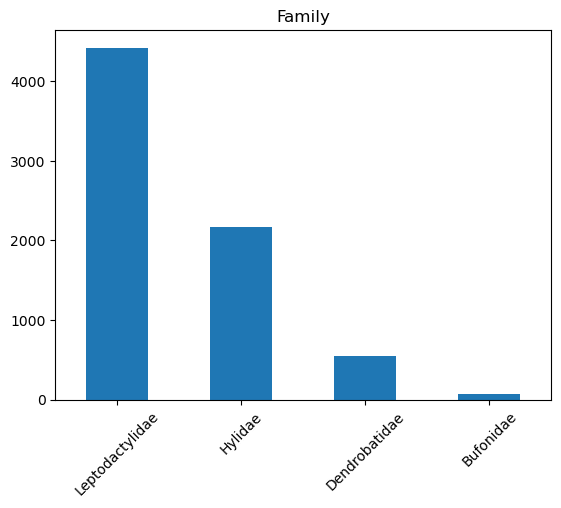

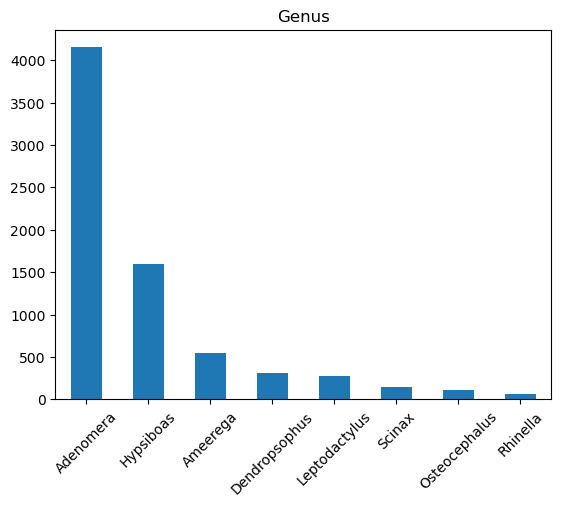

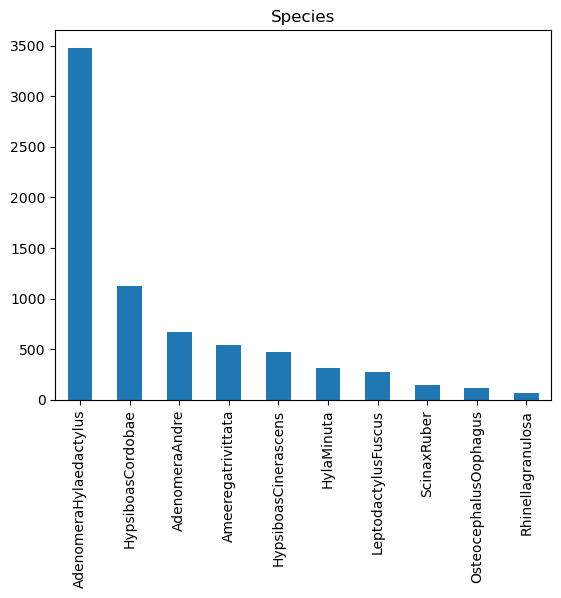

In [18]:
# Plot class distribution in each label
for label in y_train.columns:
    if label == "Species":
        pd.value_counts(AnuranCalls[label]).plot.bar()
    else:
        pd.value_counts(AnuranCalls[label]).plot.bar(rot=45)
    plt.title(label)
    plt.show()

We can see that class imbalance exists among different labels. To deal with the class imbalance, let's use SMOTE.

#### L1-penalized SVMs with SMOTE - Large Parameters

In [19]:
%%time
# Set up pipeline
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],  # Use SMOTE in each iteration
                                ['svm', LinearSVC()]])

# Define "large parameters" setting
params = {
    'svm__penalty': ['l1'],
    'svm__dual': [False],
    'svm__C': C_large,
    'svm__multi_class': ['ovr'],
    'svm__max_iter': [5000]
}

# Define GridSearchCV object
svclassifier = GridSearchCV(estimator=pipeline,
                            param_grid=params,
                            cv=10,
                            n_jobs=8)

# Fit LinearSVC for each label
for label in y_train.columns:
    svclassifier.fit(X_train_stand, y_train[label])
    cv_score = svclassifier.best_score_

    # Report model statistics
    print("Current label:", label)
    print(svclassifier.best_estimator_)
    print(f'Cross-validation score: {cv_score}\n')

Current label: Family
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ['svm',
                 LinearSVC(C=10, dual=False, max_iter=5000, penalty='l1')]])
Cross-validation score: 0.9213697970904731

Current label: Genus
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ['svm',
                 LinearSVC(C=100, dual=False, max_iter=5000, penalty='l1')]])
Cross-validation score: 0.9128301618858281

Current label: Species
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ['svm',
                 LinearSVC(C=1, dual=False, max_iter=5000, penalty='l1')]])
Cross-validation score: 0.9569081542491086

CPU times: total: 35 s
Wall time: 6min 16s


#### L1-penalized SVMs with SMOTE - Small Parameters

In [20]:
%%time
# Set up pipeline
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],  # Use SMOTE in each iteration
                                ['svm', LinearSVC()]])

# Define "small parameters" setting
params = {
    'svm__penalty': ['l1'],
    'svm__dual': [False],
    'svm__C': C_small,
    'svm__multi_class': ['ovr'],
    'svm__max_iter': [5000]
}

# Define GridSearchCV object
svclassifier = GridSearchCV(estimator=pipeline,
                            param_grid=params,
                            cv=10,
                            n_jobs=8)

# Fit LinearSVC for each label
for label in y_train.columns:
    svclassifier.fit(X_train_stand, y_train[label])
    cv_score = svclassifier.best_score_

    # Report model statistics
    print("Current label:", label)
    print(svclassifier.best_estimator_)
    print(f'Cross-validation score: {cv_score}\n')

Current label: Family
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ['svm',
                 LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')]])
Cross-validation score: 0.9199809082015842

Current label: Genus
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ['svm',
                 LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')]])
Cross-validation score: 0.9108428792325413

Current label: Species
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ['svm',
                 LinearSVC(C=0.1, dual=False, max_iter=5000, penalty='l1')]])
Cross-validation score: 0.9557180725172773

CPU times: total: 32.5 s
Wall time: 2min 19s


We use similar method to narrow down the range of parameters, and then we pick the optiaml one by using cross validation.

#### L1-penalized SVMs with SMOTE - The Final Model

Choose some lambda.

In [21]:
# Create paramter sets
C = np.logspace(-1, 1, 20)
print(C)

[ 0.1         0.1274275   0.16237767  0.20691381  0.26366509  0.33598183
  0.42813324  0.54555948  0.6951928   0.88586679  1.12883789  1.43844989
  1.83298071  2.33572147  2.97635144  3.79269019  4.83293024  6.15848211
  7.8475997  10.        ]


In [22]:
%%time
# Set up pipeline
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],  # Use SMOTE in each iteration
                                ['svm', LinearSVC()]])

# Define "small parameters" setting
params = {
    'svm__penalty': ['l1'],
    'svm__dual': [False],
    'svm__C': C,
    'svm__multi_class': ['ovr'],
    'svm__max_iter': [5000]
}

# Define GridSearchCV object
svclassifier = GridSearchCV(estimator=pipeline,
                            param_grid=params,
                            cv=10,
                            n_jobs=8)

# Fit LinearSVC for each label
for label in y_train.columns:
    svclassifier.fit(X_train_stand, y_train[label])
    # Prediction on training and testing set
    y_train_pred = svclassifier.predict(X_train_stand)
    y_test_pred = svclassifier.predict(X_test_stand)
    cv_score = svclassifier.best_score_
    # Obtain exact match score
    train_score = accuracy_score(y_train[label], y_train_pred)
    test_score = accuracy_score(y_test[label], y_test_pred)
    # Obtain hamming loss
    hamming_loss_train = hamming_loss(y_train[label], y_train_pred)
    hamming_loss_test = hamming_loss(y_test[label], y_test_pred)
    
    
    # Report model statistics
    print("Current label:", label)
    print(svclassifier.best_estimator_)
    print(f'Cross-validation score: {cv_score}')
    print(f'Train exact match: {train_score}\nTrain hamming loss: {hamming_loss_train}')
    print(f'Test exact match: {test_score}\nTest hamming loss: {hamming_loss_test}\n')

Current label: Family
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ['svm',
                 LinearSVC(C=2.9763514416313175, dual=False, max_iter=5000,
                           penalty='l1')]])
Cross-validation score: 0.9213697970904731
Train exact match: 0.9241461477362987
Train hamming loss: 0.07585385226370135
Test exact match: 0.9092172301991662
Test hamming loss: 0.09078276980083372

Current label: Genus
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ['svm',
                 LinearSVC(C=4.832930238571752, dual=False, max_iter=5000,
                           penalty='l1')]])
Cross-validation score: 0.9128297674271829
Train exact match: 0.920571882446386
Train hamming loss: 0.07942811755361398
Test exact match: 0.9018063918480778
Test hamming loss: 0.09819360815192218

Current label: Species
Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ['svm',
                 LinearSVC(C=0.33598182862837817, dual=False, max_iter=5000

We see that the model with the implementation of SMOTE choose a distinct set of values. In the class "Species", the model with the implementation of SMOTE seems performing better.

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
**Monte-Carlo Simulation:** Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

I perform one itration first following part (a), (b), and (c). Then I perform Monte-Carlo simulation.

## (a)
Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose $k \in \{1, 2, \dots, 50\}$ automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [23]:
# Obtain labels and features from AnuranCalls
AnuranCalls_features = AnuranCalls.iloc[:, :-3]
AnuranCalls_labels = AnuranCalls.iloc[:, -3:]

In [24]:
%%time
# Use Silhouettes to find optimal K
sil_score = list()
k_range = [i for i in range(2, 51)]
# Start from k=2 as Silhouette Coefficient is only defined 
# if number of labels is 2 <= n_labels <= n_samples - 1
for k in k_range:
    kmeans = KMeans(n_clusters=k, 
                    init="k-means++", 
                    n_init=10, 
                   )
    kmeans.fit(AnuranCalls_features)
    score = silhouette_score(AnuranCalls_features, kmeans.labels_)
    sil_score.append(score)

CPU times: total: 5min 14s
Wall time: 54.8 s


In [25]:
# Find optimal K
optimal_k = np.argmax(sil_score)+2
print("Optimal value of k:", optimal_k)

Optimal value of k: 4


In [26]:
# Report Silhouettes highest score
sil_score_df = pd.DataFrame({'cluster' : k_range, 'sil_score' : sil_score})
display(sil_score_df.sort_values(by=['sil_score'], ascending=False).head(5))

,cluster,sil_score
2,4,0.378751
3,5,0.371483
1,3,0.367693
0,2,0.348678
13,15,0.288771


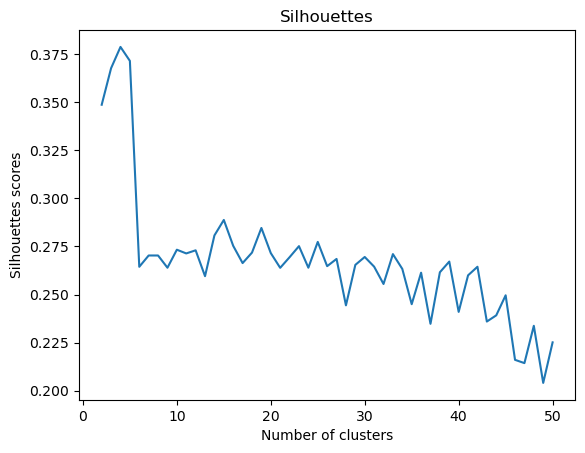

In [27]:
# Plot result
plt.plot('cluster', 'sil_score', data=sil_score_df)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouettes scores")
plt.title("Silhouettes")
plt.show()

From the result above, we see that the number of clusters = 4 is a reasonable choice for our data.

## (b) 
In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [28]:
# Fit K-Means with optimal k selected
kmeans_model = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10)
kmeans_model.fit(AnuranCalls_features)

# Generate dataframe to perform analysis
kmeans_labels = pd.DataFrame({'labels': kmeans_model.labels_})
labels_df = pd.concat([kmeans_labels, AnuranCalls_labels], axis=1)  # Kmeans labels and true labels

In [29]:
# Hold majority information for each cluster
label_majorityclass = dict()

# Find majority in each cluster for family, genus, and species
for i in range(0, optimal_k):
    labels_temp_df = labels_df[labels_df["labels"]==i]  # Obtain subset of dataframe based on cluster number
    
    majority_name_temp = list()
    # Find the majority class in family, genus, and species column
    for label in AnuranCalls_labels.columns:
        majority_name_temp.append(labels_temp_df[label].value_counts().idxmax())
    
    # Store information 
    label_majorityclass[i] = majority_name_temp

In [30]:
label_majorityclass

{0: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 1: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 3: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']}

## (c) 
Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [31]:
# Generate class -> index dictionary to help us iterate through information
label_index_pointer = dict()
index = 0
for label in AnuranCalls_labels.columns:
    label_index_pointer[label] = index
    index += 1

In [32]:
avg_hamming_distance = list()
avg_hamming_score = list()
avg_hamming_loss = list()

hamming_distance = list()

hamming_score = list()
hamming_loss = list()

for i in range(0, optimal_k):
    
    labels_temp_df = labels_df[labels_df["labels"]==i]
    
    for label in AnuranCalls_labels.columns:
        # Obtain number of collect labels and incorrect labels
        Incorrect_labels = (labels_temp_df[label]!=label_majorityclass[i][label_index_pointer[label]]).sum()
        Correct_labels = (labels_temp_df[label]==label_majorityclass[i][label_index_pointer[label]]).sum()
        # Calculate hamming distance and store
        hamming_distance.append(Incorrect_labels)
        # Calculate hamming scores and store
        hamming_score.append(Correct_labels/labels_temp_df.shape[0])
        # Calculate hamming loss and store
        hamming_loss.append(Incorrect_labels/labels_temp_df.shape[0])
    
    # Calculate average hamming distanc, hamming scores, and hamming loss
    avg_hamming_distance = statistics.mean(hamming_distance)
    avg_hamming_score = statistics.mean(hamming_score)
    avg_hamming_loss = statistics.mean(hamming_loss)

# Report statistics
print(f"Average hamming distance: {avg_hamming_distance:.3f}")
print(f"Average hamming scores: {avg_hamming_score:.3f}")
print(f"Average hamming loss: {avg_hamming_loss:.3f}")

Average hamming distance: 400.000
Average hamming scores: 0.718
Average hamming loss: 0.282


### Monte-Carlo Simulation

In [33]:
montecarlo_hamming_distance = list()
montecarlo_hamming_score = list()
montecarlo_hamming_loss = list()

for num_iteration in tqdm_notebook(range(50)):
    """ 
    Part(a)
    """
    sil_score = list()
    k_range = [i for i in range(2, 51)]
    # Start from k=2 as Silhouette Coefficient is only defined 
    # if number of labels is 2 <= n_labels <= n_samples - 1
    for k in k_range:
        kmeans = KMeans(n_clusters=k, 
                        init="k-means++", 
                        n_init=10, 
                       )
        kmeans.fit(AnuranCalls_features)
        score = silhouette_score(AnuranCalls_features, kmeans.labels_)
        sil_score.append(score)
    
    # Find optimal K
    optimal_k = np.argmax(sil_score)+2
    
    """
    Part(b)
    """
    # Fit K-Means with optimal k selected
    kmeans_model = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10)
    kmeans_model.fit(AnuranCalls_features)

    # Generate dataframe to perform analysis
    kmeans_labels = pd.DataFrame({'labels': kmeans_model.labels_})
    labels_df = pd.concat([kmeans_labels, AnuranCalls_labels], axis=1)  # Kmeans labels and true labels
    
    # Hold majority information for each cluster
    label_majorityclass = dict()

    # Find majority in each cluster for family, genus, and species
    for i in range(0, optimal_k):
        labels_temp_df = labels_df[labels_df["labels"]==i]  # Obtain subset of dataframe based on cluster number

        majority_name_temp = list()
        # Find the majority class in family, genus, and species column
        for label in AnuranCalls_labels.columns:
            majority_name_temp.append(labels_temp_df[label].value_counts().idxmax())

        # Store information 
        label_majorityclass[i] = majority_name_temp

    # print(label_majorityclass)
    
    """
    Part(c)
    """
    avg_hamming_distance = list()
    avg_hamming_score = list()
    avg_hamming_loss = list()

    hamming_distance = list()
    hamming_score = list()
    hamming_loss = list()

    for i in range(0, optimal_k):

        labels_temp_df = labels_df[labels_df["labels"]==i]

        for label in AnuranCalls_labels.columns:
            # Obtain number of collect labels and incorrect labels
            Incorrect_labels = (labels_temp_df[label]!=label_majorityclass[i][label_index_pointer[label]]).sum()
            Correct_labels = (labels_temp_df[label]==label_majorityclass[i][label_index_pointer[label]]).sum()
            # Calculate hamming distance and store
            hamming_distance.append(Incorrect_labels)
            # Calculate hamming scores and store
            hamming_score.append(Correct_labels/labels_temp_df.shape[0])
            # Calculate hamming loss and store
            hamming_loss.append(Incorrect_labels/labels_temp_df.shape[0])

        # Calculate average hamming distance, hamming scores, and hamming loss
        avg_hamming_distance = statistics.mean(hamming_distance)
        avg_hamming_score = statistics.mean(hamming_score)
        avg_hamming_loss = statistics.mean(hamming_loss)
    
    # Save result for each run
    montecarlo_hamming_distance.append(avg_hamming_distance)
    montecarlo_hamming_score.append(avg_hamming_score)
    montecarlo_hamming_loss.append(avg_hamming_loss)
    
    # Output iteration result every 10 iteration
    if num_iteration%10 == 0:
        print("Current iteration:", num_iteration+1)
        print(f"Average hamming distance: {avg_hamming_distance:.3f}")
        print(f"Average hamming scores: {avg_hamming_score:.3f}")
        print(f"Average hamming loss: {avg_hamming_loss:.3f}\n")

  0%|          | 0/50 [00:00<?, ?it/s]

Current iteration: 1
Average hamming distance: 400.000
Average hamming scores: 0.718
Average hamming loss: 0.282

Current iteration: 11
Average hamming distance: 400.000
Average hamming scores: 0.718
Average hamming loss: 0.282

Current iteration: 21
Average hamming distance: 400.000
Average hamming scores: 0.718
Average hamming loss: 0.282

Current iteration: 31
Average hamming distance: 400.000
Average hamming scores: 0.718
Average hamming loss: 0.282

Current iteration: 41
Average hamming distance: 400.000
Average hamming scores: 0.718
Average hamming loss: 0.282



In [34]:
# Report result of average and standard deviation of hamming distance after 50 iterations
average_montecarlo_hamming_distance = statistics.mean(montecarlo_hamming_distance)
stdev_montecarlo_hamming_distance = statistics.stdev(montecarlo_hamming_distance)

print(f"Average hamming distance: {average_montecarlo_hamming_distance:.3f}")
print(f"Standard deviation: {stdev_montecarlo_hamming_distance:.3f}")

Average hamming distance: 404.000
Standard deviation: 17.088


# 3. ISLR 12.6.2

## (a) 
On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

If the image does not show up, please refer to Qa.png in the notebook folder.

![Question (a)](../notebook/Qa.png)

## (b)
Repeat (a), this time using single linkage clustering.

If the image does not show up, please refer to Qb.png in the notebook folder.

![Question (b)](../notebook/Qb.png)

## (c) 
Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?f

We will have cluster (1, 2) and (3, 4).

## (d)
Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

We will obtain ((1, 2), 3) and (4).

## (e)
It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

If the image does not show up, please refer to Qe.png in the notebook folder.

![Question (e)](../notebook/Qe.png)

# Reference

[Normalization vs Standardization — Quantitative analysis](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf)

[Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

[sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

[sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[Support Vector Machines (SVM) in Python with Sklearn](https://datagy.io/python-support-vector-machines/)